# <div align="center"> 置信区间和预测区间 </div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table

import warnings

warnings.filterwarnings('ignore')
    
%matplotlib inline

plt.style.use('ggplot')

In [2]:
## Dataset: 不良贷款 (亿元） ~ 各项贷款余额 

db = '/home/lidong/Datasets/'
bad_loans_df = pd.read_excel(os.path.join(db, "Statistics/bad-loans.xls"), usecols="B:F")
bad_loans_df[0:3]

,不良贷款 (亿元）,各项贷款余额 (亿元),本年累计应收贷款 (亿元),贷款项目个数 (个),本年固定资产投资额 (亿元)
0,0.9,67.3,6.8,5,51.9
1,1.1,111.3,19.8,16,90.9
2,4.8,173.0,7.7,17,73.7


In [3]:
## Regress 
ys_loans_bad = bad_loans_df.iloc[:, 0]
xs_loans_balance = bad_loans_df.iloc[:, 1]

xs_loans_balance_with_intercept = sm.add_constant(xs_loans_balance)
xs_loans_balance_with_intercept[-3:]

,const,各项贷款余额 (亿元)
22,1.0,109.6
23,1.0,196.2
24,1.0,102.2


In [4]:
fitted_result = sm.OLS(endog=ys_loans_bad, exog=xs_loans_balance_with_intercept).fit()
print(fitted_result.summary())

                            OLS Regression Results                            
Dep. Variable:              不良贷款
(亿元）   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     56.75
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.18e-07
Time:                        22:12:10   Log-Likelihood:                -51.508
No. Observations:                  25   AIC:                             107.0
Df Residuals:                      23   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8295      0.723     -1.147      

In [5]:
simple_table, data_nd, ss2_list = summary_table(fitted_result, alpha=0.05)
data_df = pd.DataFrame(data_nd, columns=ss2_list)
data_df[-3:]

,Obs,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
22,23.0,1.2,3.323739,0.399609,2.497085,4.150393,-0.854683,7.502161,-2.123739,1.939202,-1.095161,0.025465
23,24.0,7.2,6.605421,0.550175,5.467296,7.743545,2.354400,10.856442,0.594579,1.901972,0.312612,0.004089
24,25.0,3.2,3.043318,0.406285,2.202853,3.883784,-1.137858,7.224495,0.156682,1.937814,0.080855,0.000144


In [6]:
data_df.iloc[-3:, 2:8]

,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp
22,3.323739,0.399609,2.497085,4.150393,-0.854683,7.502161
23,6.605421,0.550175,5.467296,7.743545,2.354400,10.856442
24,3.043318,0.406285,2.202853,3.883784,-1.137858,7.224495


In [7]:
# Prediction interval is the confidence interval for an observation and includes the estimate of the error.
prstd, lower95, upper95 = wls_prediction_std(fitted_result, alpha=0.05)
pd.DataFrame({'Predict std': prstd, 'Predict ci 95% low':lower95, 'Predict ci 95% upp':upper95})[-3:]

,Predict ci 95% low,Predict ci 95% upp,Predict std
22,-0.854683,7.502161,2.019871
23,2.354400,10.856442,2.054966
24,-1.137858,7.224495,2.021203


In [8]:
predicted_values = data_nd[:, 2]
predict_mean_std = data_nd[:, 3]
predict_mean_ci_low95, predict_mean_ci_upp95 = data_nd[:, 4:6].T
predict_ci_low95, predict_ci_upp95 = data_nd[:, 6:8].T

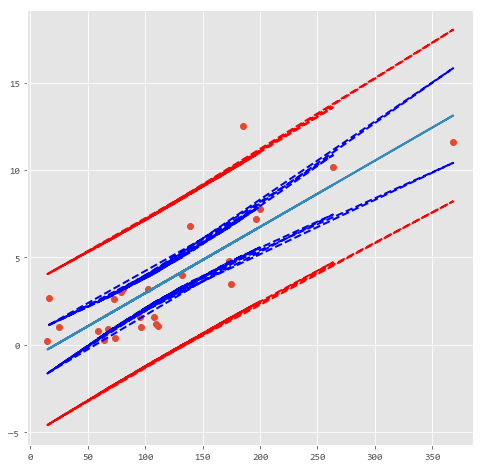

In [9]:
plt.figure(figsize=(8,8))
plt.plot(xs_loans_balance, ys_loans_bad, 'o')
plt.plot(xs_loans_balance, predicted_values, '-', lw=2)
plt.plot(xs_loans_balance, predict_ci_low95, 'r--', lw=2)
plt.plot(xs_loans_balance, predict_ci_upp95, 'r--', lw=2)
plt.plot(xs_loans_balance, predict_mean_ci_low95, 'b--', lw=2)
plt.plot(xs_loans_balance, predict_mean_ci_upp95, 'b--', lw=2)